In [45]:
%matplotlib inline
# pandas for data manipulation
import pandas as pd
pd.options.mode.chained_assignment = None
# nltk for nlp
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
# list of stopwords like articles, preposition
stop = set(stopwords.words('english'))
from string import punctuation
from collections import Counter
import re
import numpy as np
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [46]:
data=pd.read_csv("news.csv")

In [47]:
data.head()

,author,description,publishedAt,source,title,url,urlToImage,category,scraping_date
0,http://www.abc.net.au/news/sarah-ferguson/6970476,NSW Police Commissioner Mick Fuller has conced...,2017-05-24T08:56:33Z,abc-news-au,NSW top cop says 'we should have gone in earli...,http://www.abc.net.au/news/2017-05-24/police-s...,http://www.abc.net.au/news/image/5968840-1x1-7...,general,2017-05-24 17:59:56.551663
1,http://www.abc.net.au/news/emma--younger/6455416,Lawyers warned magazine Woman's Day not to pub...,2017-05-24T05:10:01Z,abc-news-au,Rebel Wilson breaks down while giving evidence...,http://www.abc.net.au/news/2017-05-24/rebel-wi...,http://www.abc.net.au/news/image/8554360-1x1-7...,general,2017-05-24 17:59:56.551663
2,Al Jazeera,Ongoing violence prompts 'mass exodus' from Ma...,2017-05-24T10:49:00Z,al-jazeera-english,Mindanao: Churchgoers 'taken hostage' amid Mar...,http://www.aljazeera.com/news/2017/05/mindanao...,http://www.aljazeera.com/mritems/Images/2017/5...,general,2017-05-24 17:59:56.551663
3,Al Jazeera,'Wider group of individuals' may be linked to ...,2017-05-24T02:51:00Z,al-jazeera-english,Britain's security alert level raised to 'crit...,http://www.aljazeera.com/news/2017/05/britain-...,http://www.aljazeera.com/mritems/Images/2017/5...,general,2017-05-24 17:59:56.551663
4,Al Jazeera,Judges in small island nation say current laws...,2017-05-24T09:42:00Z,al-jazeera-english,Taiwan top court rules in favour of gay marriage,http://www.aljazeera.com/news/2017/05/taiwan-t...,http://www.aljazeera.com/mritems/Images/2017/5...,general,2017-05-24 17:59:56.551663


In [48]:
print ("data shape: ",data.shape)

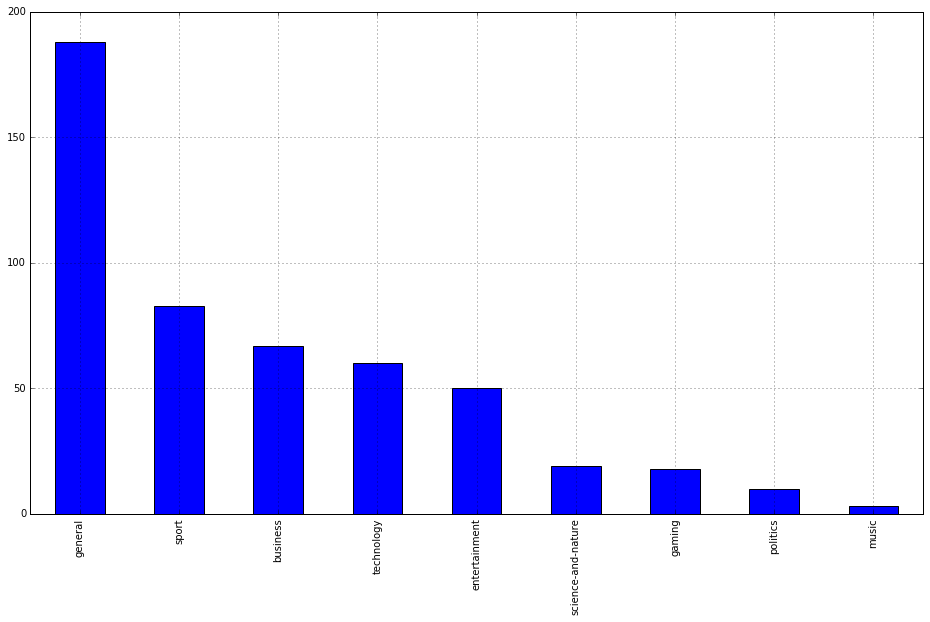

In [49]:
data.category.value_counts().plot(kind="bar",grid=True,figsize=(16,9))

In [50]:
data = data.drop_duplicates('description')

In [51]:
# remove rows with empty descriptions
data = data[~data['description'].isnull()]

In [52]:


data.shape



(494, 9)

In [53]:


data['len'] = data['description'].map(len)



In [54]:
data = data[data.len > 140]
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)



In [55]:
data.shape

(157, 10)

In [70]:
def tokenizer(text):
    try:
        tokens_ = [word_tokenize(sent) for sent in sent_tokenize(text)]
        
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent

        tokens = list(filter(lambda t: t.lower() not in stop, tokens))
        tokens = list(filter(lambda t: t not in punctuation, tokens))
        tokens = list(filter(lambda t: t not in [u"'s", u"n't", u"...", u"''", u'``', 
                                            u'\u2014', u'\u2026', u'\u2013'], tokens))
        filtered_tokens = []
        for token in tokens:
            if re.search('[a-zA-Z]', token):
                filtered_tokens.append(token)

        filtered_tokens = list(map(lambda token: token.lower(), filtered_tokens))

        return filtered_tokens
    except Error as e:
        print(e)

In [60]:
data['tokens'] = data['description'].map(tokenizer)

NameError: global name 'Error' is not defined

In [38]:
for descripition, tokens in zip(data['description'].head(5), data['tokens'].head(5)):
    print('description:', descripition)
    print('tokens:', tokens)
    print() 

('description:', 'NSW Police Commissioner Mick Fuller has conceded that armed officers at the 2014 Sydney siege should have been sent in earlier to rescue the hostages.')
('tokens:', None)
()
('description:', "Lawyers warned magazine Woman's Day not to publish claims about Hollywood actress Rebel Wilson, which are now at the centre of a defamation case, a court hears.")
('tokens:', None)
()
('description:', 'MANCHESTER, England (AP) \xe2\x80\x94 British police and intelligence agencies arrested three more suspects Wednesday in connection with the Manchester suicide bombing and moved quickly to secure key sites across the country, including Buckingham Palace and the British Parliament at Westminster. Home Secretary Amber Rudd said the bomber, identified as British-born Libyan Salman Abedi, "likely" did not act alone when he killed 22 people and wounded dozens at an Ariana Grande concert Monday night in Manchester. She said he had been known to security forces "up to a point."')
('tokens